# RFM Model Analysis


**RFM** is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries

RFM stands for the three dimensions:

1. Recency – How recently did the customer purchase?
2. Frequency – How often do they purchase?
3. Monetary Value – How much do they spend?


Before starting RFM analysis we need to set objective and outcome of analysis, for this example goal is to define class of customer example - Platinum, Gold and Silver.
1. Platinum customer - frequent and more revenue generator.
2. Gold customer - frequent but less revenue generator.
3. silver customer - less frequent and less revenue generator.

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
plt.style.use('bmh')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd


dataset_path = '/content/rfm_stock_data.csv'
df = pd.read_csv(dataset_path, encoding='ISO-8859-1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.lower()

df = df.query('quantity>0 and unitprice>0')

In [7]:
df['invoicedate'].str.split(' ')

,invoicedate
0,"[12/1/2010, 8:26]"
1,"[12/1/2010, 8:26]"
2,"[12/1/2010, 8:26]"
3,"[12/1/2010, 8:26]"
4,"[12/1/2010, 8:26]"
...,...
541904,"[12/9/2011, 12:50]"
541905,"[12/9/2011, 12:50]"
541906,"[12/9/2011, 12:50]"
541907,"[12/9/2011, 12:50]"


In [8]:
df['invoicedate'].str.split(' ',expand=True)

,0,1
0,12/1/2010,8:26
1,12/1/2010,8:26
2,12/1/2010,8:26
3,12/1/2010,8:26
4,12/1/2010,8:26
...,...,...
541904,12/9/2011,12:50
541905,12/9/2011,12:50
541906,12/9/2011,12:50
541907,12/9/2011,12:50


In [10]:
df['invoicedate'].str.split(' ',expand=True).rename({0:'first column',1:'second column'},axis=1).iloc[:,0]

,first column
0,12/1/2010
1,12/1/2010
2,12/1/2010
3,12/1/2010
4,12/1/2010
...,...
541904,12/9/2011
541905,12/9/2011
541906,12/9/2011
541907,12/9/2011


In [12]:
df['invoicedate'].str.split(' ',expand=True).rename({0:'first column',1:'second column'},axis=1).loc[:,'first column']

,first column
0,12/1/2010
1,12/1/2010
2,12/1/2010
3,12/1/2010
4,12/1/2010
...,...
541904,12/9/2011
541905,12/9/2011
541906,12/9/2011
541907,12/9/2011


In [13]:
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.lower()

df = df.query('quantity>0 and unitprice>0')
#Convert Date Strings to datetime Objects
df['invoicedate'] = pd.to_datetime(df['invoicedate'].str.split(' ',expand=True).iloc[:,0])

In [14]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [15]:
# df = pd.read_csv('data.csv')

# Convert Spaces and Hyphens in Column Names to Underscores
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.lower()

df = df.query('quantity>0 and unitprice>0')

# remove missing value
df.dropna(subset=['customerid'],how='all',inplace=True)

# set groups
df['year'] = df.invoicedate.dt.year
df['month'] = df.invoicedate.dt.month
df['months'] = df.year.astype(str) + '-' + df.month.astype(str)
df['totalcost'] =  df['unitprice'] * df['quantity']

In [16]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,year,month,months,totalcost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010,12,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010,12,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010,12,2010-12,20.34


In [17]:
df[["quantity"]] = df[["quantity"]].astype(int)
rfm = df.pivot_table(
    index='customerid',
    values = ["invoiceno","totalcost","invoicedate"],
    aggfunc={
        "invoiceno": pd.Series.nunique,
        "totalcost" :"sum",
        "invoicedate": "max"
    }
)

# calculate the time interval (R) for each transaction relative to the latest transaction date for all users
rfm['Recency'] = (rfm.invoicedate.max() - rfm.invoicedate) / np.timedelta64(1, 'D')

# F: Total number of purchases for each customer.M: Total sales amount for each customer
rfm.rename(columns={
        "invoiceno": "Frequency",
        "totalcost": "Monetary"
    }, inplace = True)
rfm.head()

,invoicedate,Frequency,Monetary,Recency
customerid,,,,
12346.0,2011-01-18,1,77183.60,325.0
12347.0,2011-12-07,7,4310.00,2.0
12348.0,2011-09-25,4,1797.24,75.0
12349.0,2011-11-21,1,1757.55,18.0
12350.0,2011-02-02,1,334.40,310.0


Next, customer value labels are assigned, categorizing customers into eight levels.

In [21]:
# To compare based on the average value, assign 1 if the value is above the mean, otherwise assign 0.
rfm[['Recency','Frequency','Monetary']].apply(lambda x:(x-x.mean())/x.std())

def rfm_func(x):
    level = x.apply(lambda x:'1'if x>0 else '0')
    level = level.Recency + level.Frequency + level.Monetary
    d = {
        "111": "Important Value Customer",
        "011": "Important Retention Customer",
        "101": "Important Rescue Customer",
        "001": "Important Development Customer",
        "110": "General Value Customer",
        "010": "General Retention Customer",
        "100": "General Rescue Customer",
        "000": "General Development Customer"
    }
    result = d[level]
    return result

rfm['label']= rfm[['Recency','Frequency','Monetary']].apply(lambda x:(x-x.mean())/x.std()).apply(rfm_func, axis=1)
rfm.head()

,invoicedate,Frequency,Monetary,Recency,label
customerid,,,,,
12346.0,2011-01-18,1,77183.60,325.0,Important Rescue Customer
12347.0,2011-12-07,7,4310.00,2.0,Important Retention Customer
12348.0,2011-09-25,4,1797.24,75.0,General Development Customer
12349.0,2011-11-21,1,1757.55,18.0,General Development Customer
12350.0,2011-02-02,1,334.40,310.0,General Rescue Customer


visualize the important value customers versus non-important value customers

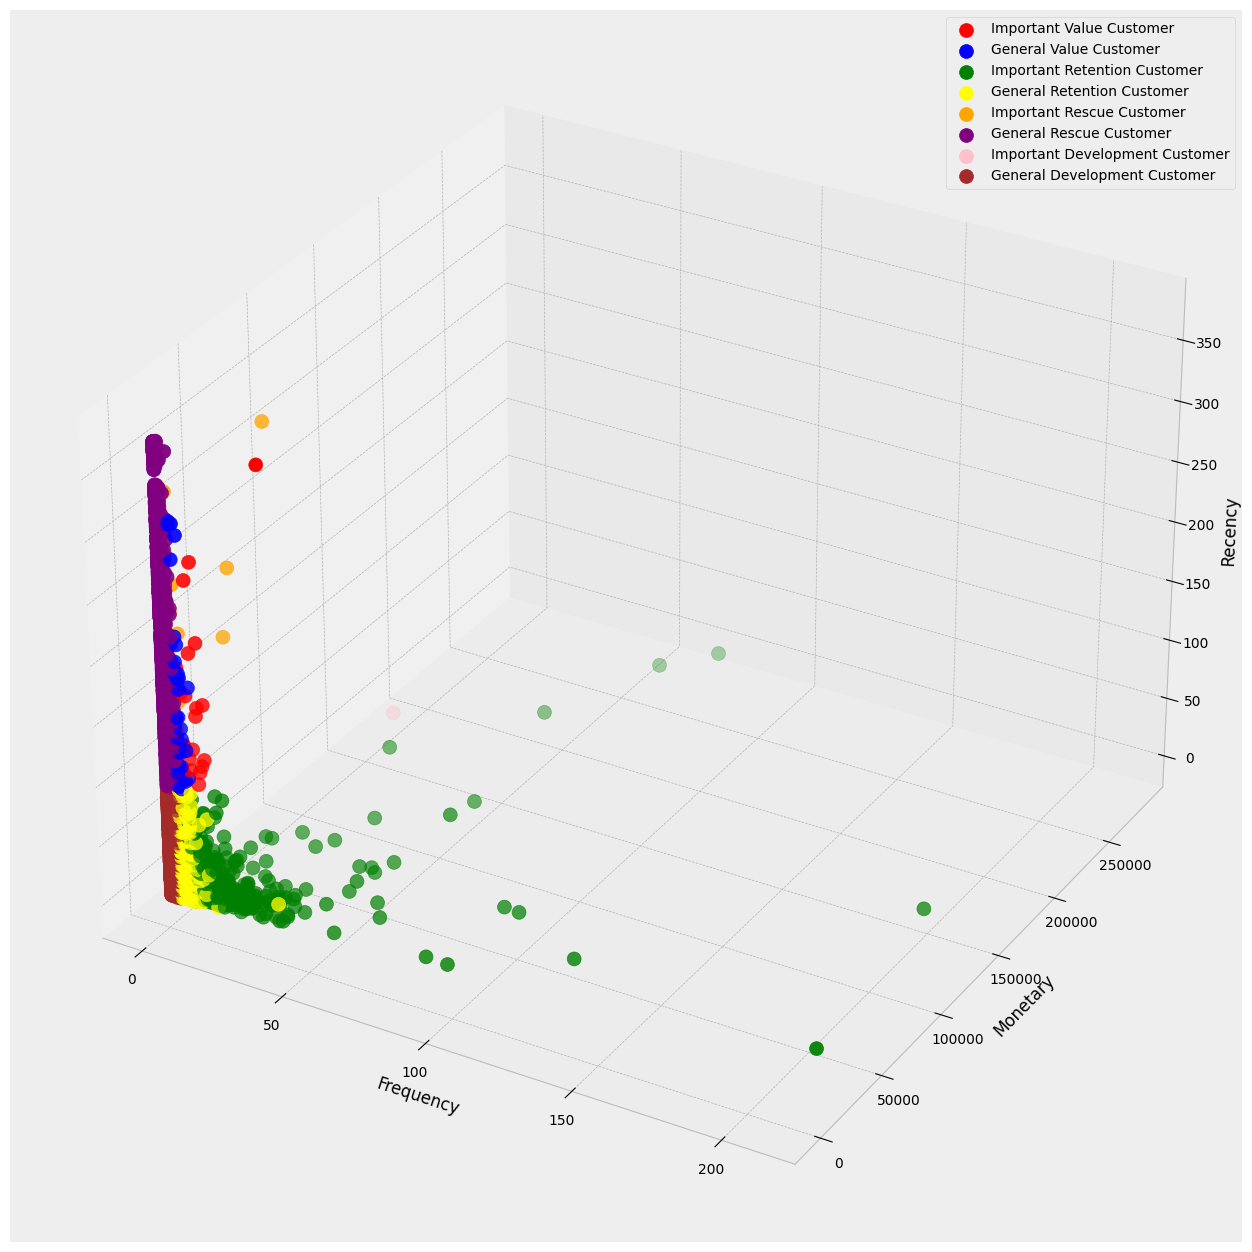

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')

df = rfm.copy()

colors = {
    "Important Value Customer": "red",
    "General Value Customer": "blue",
    "Important Retention Customer": "green",
    "General Retention Customer": "yellow",
    "Important Rescue Customer": "orange",
    "General Rescue Customer": "purple",
    "Important Development Customer": "pink",
    "General Development Customer": "brown"
}

invalid_label = set(df['label'].unique()) - set(colors.keys())
if invalid_label:
  raise ValueError("Invalid label: {}".format(invalid_label))



scatter= ax.scatter(df['Frequency'], df['Monetary'], df['Recency'], c=df['label'].map(colors), s = 100)

ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Recency')

for label, color in colors.items():
    ax.scatter([], [], [], c=color, label=label, s = 100)

ax.legend()
plt.show()


<Axes: xlabel='Frequency', ylabel='Recency'>

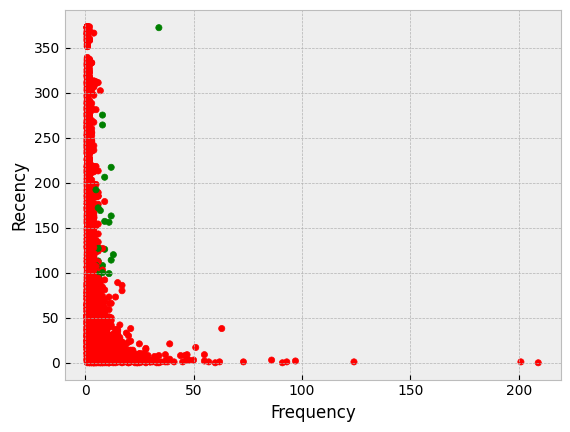

In [23]:
rfm.loc[rfm.label == "Important Value Customer", "color"] = "g"
rfm.loc[~(rfm.label == "Important Value Customer"),'color'] = "r"
rfm.plot.scatter("Frequency", "Recency", c=rfm.color)

use K-means

In [24]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

rfm_segmentation = rfm[['Recency','Frequency','Monetary']].copy()
rfm_segmentation.head()

,Recency,Frequency,Monetary
customerid,,,
12346.0,325.0,1,77183.60
12347.0,2.0,7,4310.00
12348.0,75.0,4,1797.24
12349.0,18.0,1,1757.55
12350.0,310.0,1,334.40


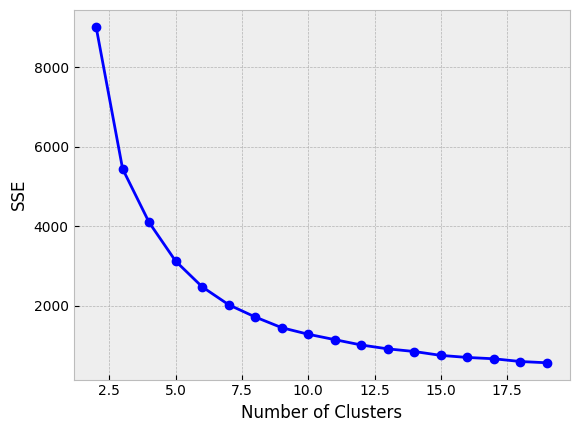

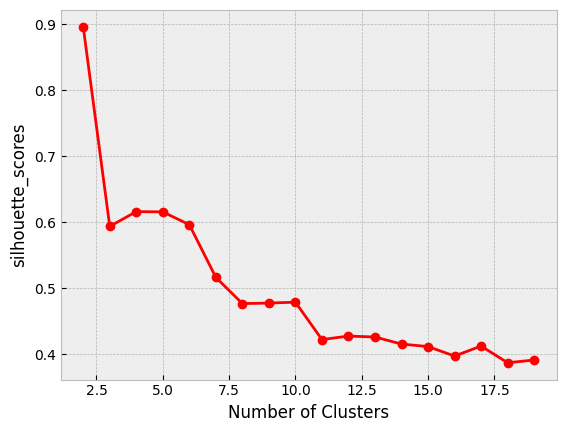

In [27]:
#  find the optimal number of clusters of  k-means clustering
sse = []
silhouette_scores = []

k_values = range(2,20)

X = rfm_segmentation.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_scores')
plt.show()

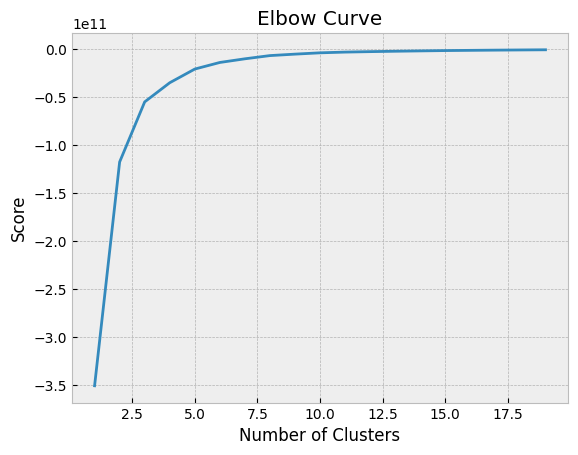

In [28]:
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that.
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

rfm_segmentation = rfm[['Recency','Frequency','Monetary']].copy()
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

By using RFM to identify different customer segments, we can measure customer value and profitability. This allows for personalized communication and marketing services, providing strong support for more marketing decisions and creating greater benefits for the business.

In [29]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

# this creates a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['cluster'] = kmeans.labels_

#check our hypothesis
rfm_segmentation[rfm_segmentation.cluster == 0].head(10)

,Recency,Frequency,Monetary,cluster
customerid,,,,
12347.0,2.0,7,4310.00,0
12348.0,75.0,4,1797.24,0
12349.0,18.0,1,1757.55,0
12350.0,310.0,1,334.40,0
12352.0,36.0,8,2506.04,0
12353.0,204.0,1,89.00,0
12354.0,232.0,1,1079.40,0
12355.0,214.0,1,459.40,0
12356.0,22.0,3,2811.43,0


<Axes: xlabel='cluster', ylabel='Recency'>

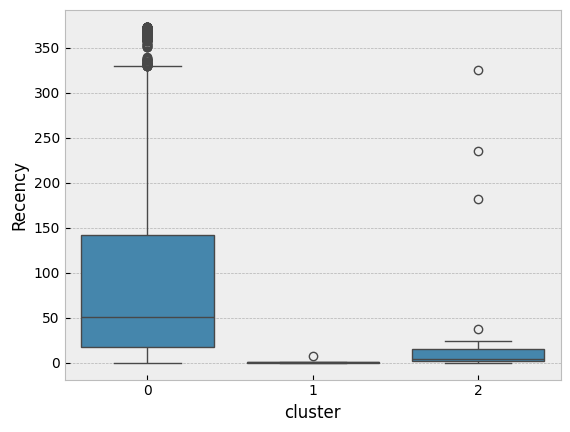

In [30]:
'''
cluster 0 have high recency rate which is bad. cluster 1 and cluster 2 having low so they are in race of platinum
and gold customer.
'''
sns.boxplot(x=rfm_segmentation.cluster,y=rfm_segmentation.Recency)

<Axes: xlabel='cluster', ylabel='Frequency'>

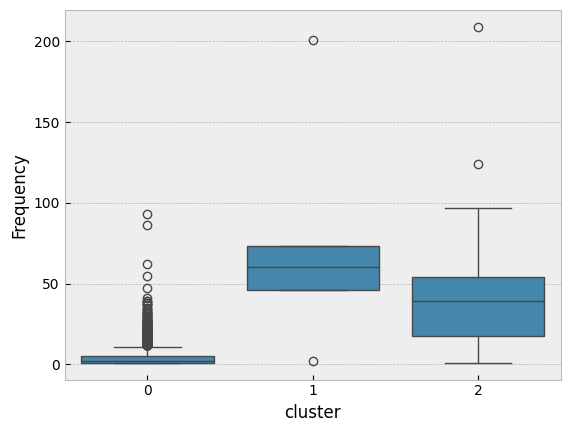

In [31]:
sns.boxplot(x=rfm_segmentation.cluster,y=rfm_segmentation.Frequency)

<Axes: xlabel='cluster', ylabel='Monetary'>

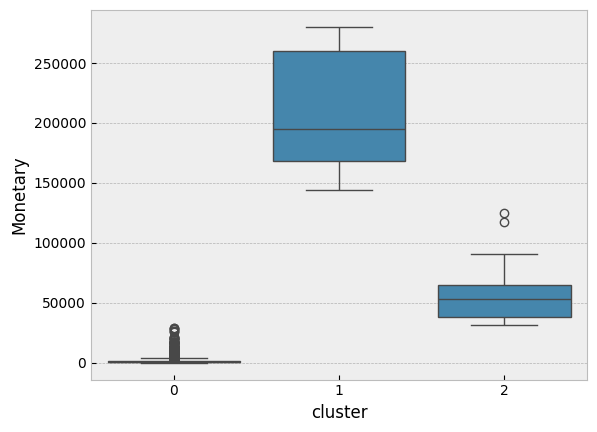

In [32]:
sns.boxplot(x=rfm_segmentation.cluster,y=rfm_segmentation.Monetary)

Based on customer Segmentation we found out cluster 2 is Platinum customers Cluster 1 is Gold Customers Cluster 3 is Silver Customers

In [40]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

#lower the recency, good for store..
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

#higher value of frequency and monetary lead to a good consumer. here higher value = 1 in reverse way.

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [48]:

quantile = rfm_segmentation[['Recency','Frequency','Monetary']].quantile(q=[0.25,0.5,0.75])
quantile = quantile.to_dict()
quantile



{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.485,
  0.75: 1661.7400000000002}}

In [49]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore,args=('Recency',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [ ]:
quantile.to_dict()

{'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000007},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75}}

In [50]:
#calculate RFM score..

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
customerid,,,,,,,,
12346.0,325.0,1,77183.60,2,4,4,1,441
12347.0,2.0,7,4310.00,0,1,1,1,111
12348.0,75.0,4,1797.24,0,3,2,1,321
12349.0,18.0,1,1757.55,0,2,4,1,241
12350.0,310.0,1,334.40,0,4,4,3,443


In [51]:
'''
Another possibility is to combine the scores to create one score (eg. 4+1+1). This will create a score
between 3 and 12. Here the advantage is that each of the scores got same importance. However some scores
will have many segments as constituents (eg - 413 ad 431)
'''

rfm_segmentation['Total_score'] = rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] + \
rfm_segmentation['M_Quartile']

In [52]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
customerid,,,,,,,,,
12346.0,325.0,1,77183.60,2,4,4,1,441,9
12347.0,2.0,7,4310.00,0,1,1,1,111,3
12348.0,75.0,4,1797.24,0,3,2,1,321,6
12349.0,18.0,1,1757.55,0,2,4,1,241,7
12350.0,310.0,1,334.40,0,4,4,3,443,11


In [53]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))

Best Customers:  456
Loyal Customers:  872
Big Spenders:  1085
Almost Lost:  34
Lost Customers:  208
Lost Cheap Customers:  444


In [54]:
rfm_segmentation.sort_values(by=['RFMScore', 'Monetary'], ascending=[True, False])

,Recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
customerid,,,,,,,,,
14646.0,1.0,73,280206.02,1,1,1,1,111,3
18102.0,0.0,60,259657.30,1,1,1,1,111,3
17450.0,8.0,46,194550.79,1,1,1,1,111,3
14911.0,1.0,201,143825.06,1,1,1,1,111,3
14156.0,9.0,55,117379.63,2,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
17102.0,261.0,1,25.50,0,4,4,4,444,12
15823.0,372.0,1,15.00,0,4,4,4,444,12
17763.0,263.0,1,15.00,0,4,4,4,444,12


In [55]:
rfm_segmentation.groupby('RFMScore')['Monetary'].mean()

,Monetary
RFMScore,
111,9547.540000
112,1286.331270
113,511.270000
114,253.920000
121,2910.558864
...,...
434,214.629524
441,8910.267273
442,994.800000


In [56]:
rfm_segmentation.groupby('Total_score')['Monetary'].mean()

,Monetary
Total_score,
3,9547.540000
4,4164.127041
5,2431.437589
6,1456.718650
7,1201.251631
8,782.687576
9,717.969937
10,384.770298
11,288.072454


<Axes: xlabel='Total_score'>

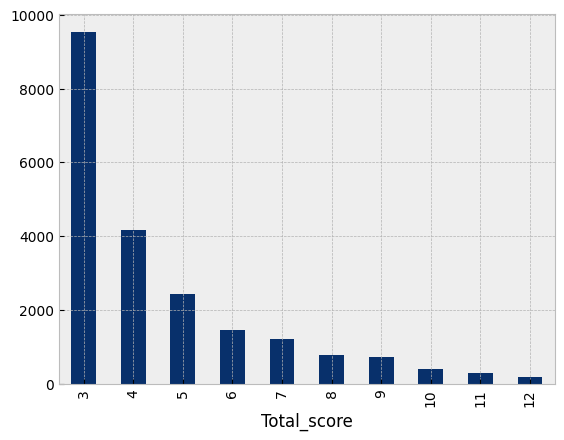

In [57]:
'''
Based on Monetary we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.
'''
rfm_segmentation.groupby('Total_score')['Monetary'].mean().plot(kind='bar', colormap='Blues_r')

<Axes: xlabel='Total_score'>

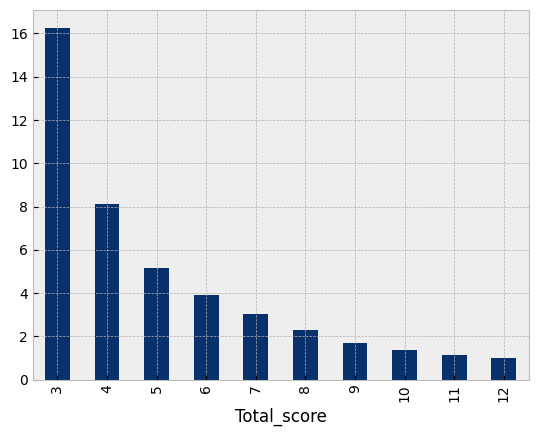

In [58]:
'''
Based on Frequncy we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.
'''
rfm_segmentation.groupby('Total_score')['Frequency'].mean().plot(kind='bar', colormap='Blues_r')

<Axes: xlabel='Total_score'>

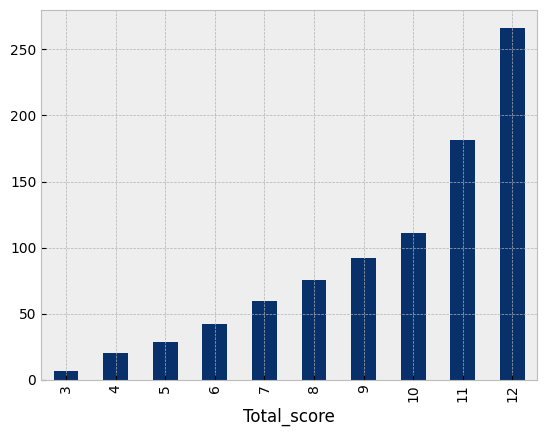

In [59]:
'''
Based on Recency we see Total_score 10,11,12 have highest value which is good for model. because it could have
combination of values such as 444, 434, 334 etc.
'''

rfm_segmentation.groupby('Total_score')['Recency'].mean().plot(kind='bar', colormap='Blues_r')

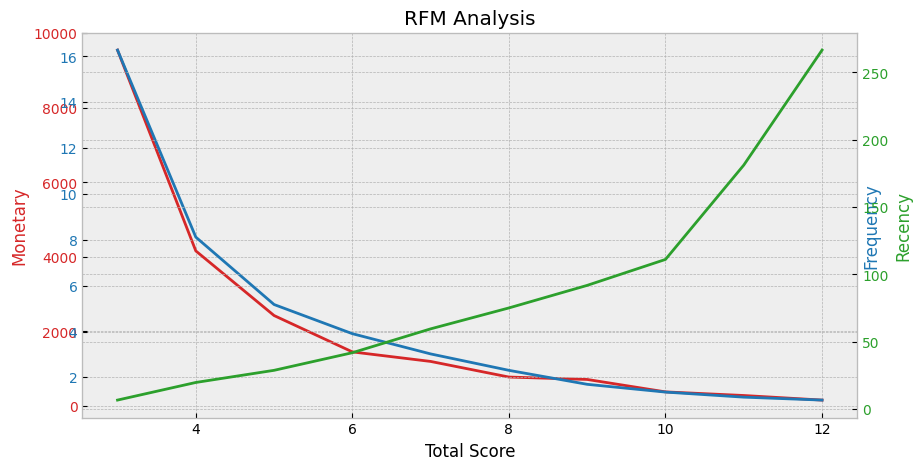

In [60]:
m = rfm_segmentation.groupby('Total_score')['Monetary'].mean()
f = rfm_segmentation.groupby('Total_score')['Frequency'].mean()
r = rfm_segmentation.groupby('Total_score')['Recency'].mean()

plt.style.use('bmh')
fig, ax1 = plt.subplots(figsize = [10,5])

color = 'tab:red'
ax1.plot(m.index, m.values,color=color)
ax1.set_title('RFM Analysis')
ax1.set_xlabel('Total Score')
ax1.set_ylabel('Monetary', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(f.index, f.values,color=color)
ax2.set_ylabel('Frequency', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax2.twinx()

color = 'tab:green'
ax3.plot(r.index, r.values,color=color)
ax3.set_ylabel('Recency', color=color)
ax3.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()